In [1]:
#ignore
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


## Import pre-defined shapes

In [2]:
from deplete.instance import *

There are many pre-defined shapes in `deplete.instance` module, like `tricave` which defines a shape with 3 dents

In [3]:
c=tricave(1, 0.2)

## Visualize shapes
+ Use `.draw()` method to draw a curve, with matplotlib arguments
+ `.offset()` method can offset/etch a colloid by a positive/negative offset argument
+ Use `.shift()` to move a curve
+ `axis('equal');` will give a 1:1 scaling

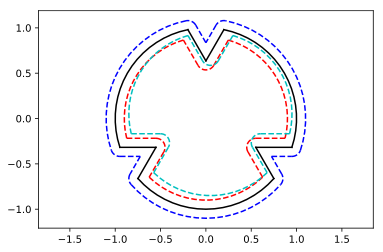

In [4]:
c.draw('k')
c.offset(0.1).draw('b--')
inner=c.offset(-0.1)
inner.draw('r--')
inner.shift([0.05, 0.05]).draw('c--')
axis('equal');

## Depletion Interaction

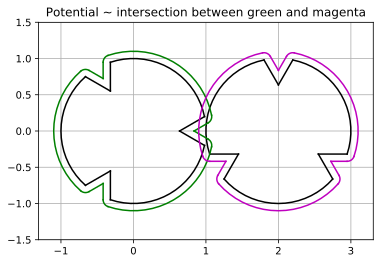

In [5]:
d=c.shift([2,0])
c=c.rotate(pi/6)
c.draw('k')
d.draw('k')
m=c.offset(0.1)
n=d.offset(0.1)
m.draw('g')
n.draw('m')
axis('equal');
grid()
title('Potential ~ intersection between green and magenta')

The depletion potential is determined by intersection of offset boundaries. Above is an example.

## Mark intersection areas
Intersections are non-maximum positive areas.

In [6]:
def mark_intersect(l):
    A=[i.area() for i in l]
    m=max(A)
    c=[(a>0 and a!=m) for a in A]
    return c

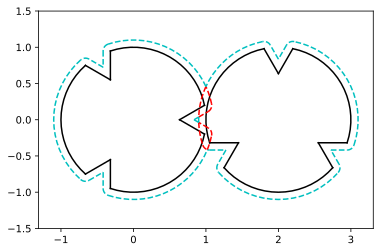

In [7]:
c.draw('k')
d.draw('k')
cs=list(Curve.intersect(m, n))
col=mark_intersect(cs)
for co, seg in zip(col, cs):
    seg.draw('cr'[co]+'--')
axis('equal');